<a href="https://colab.research.google.com/github/BenBlondeel-UCLL/Troy-ML/blob/master/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the Data (Diabetes Dataset)

In [4]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

Displaying the dataset's description

In [5]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
# let's look at the samples/features and the number of targets and feature names
print(diabetes.data.shape)
print(diabetes.target.shape)
print(diabetes.feature_names)

(442, 10)
(442,)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


Exploring the Data with Pandas

In [7]:
import pandas as pd
pd.set_option("display.precision", 4)
#pd.set_option("display.max_columns", 10)
#pd.set_option("display.width", None)
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df["Progression"] = pd.Series(diabetes.target)

# taking a look at the dataframe
print(diabetes_df.head())

      age     sex     bmi      bp      s1      s2      s3      s4      s5  \
0  0.0381  0.0507  0.0617  0.0219 -0.0442 -0.0348 -0.0434 -0.0026  0.0199   
1 -0.0019 -0.0446 -0.0515 -0.0263 -0.0084 -0.0192  0.0744 -0.0395 -0.0683   
2  0.0853  0.0507  0.0445 -0.0057 -0.0456 -0.0342 -0.0324 -0.0026  0.0029   
3 -0.0891 -0.0446 -0.0116 -0.0367  0.0122  0.0250 -0.0360  0.0343  0.0227   
4  0.0054 -0.0446 -0.0364  0.0219  0.0039  0.0156  0.0081 -0.0026 -0.0320   

       s6  Progression  
0 -0.0176        151.0  
1 -0.0922         75.0  
2 -0.0259        141.0  
3 -0.0094        206.0  
4 -0.0466        135.0  


In [8]:
# describing the data
print(diabetes_df.describe())

              age         sex         bmi          bp          s1          s2  \
count  4.4200e+02  4.4200e+02  4.4200e+02  4.4200e+02  4.4200e+02  4.4200e+02   
mean  -2.5118e-19  1.2308e-17 -2.2456e-16 -4.7976e-17 -1.3815e-17  3.9184e-17   
std    4.7619e-02  4.7619e-02  4.7619e-02  4.7619e-02  4.7619e-02  4.7619e-02   
min   -1.0723e-01 -4.4642e-02 -9.0275e-02 -1.1240e-01 -1.2678e-01 -1.1561e-01   
25%   -3.7299e-02 -4.4642e-02 -3.4229e-02 -3.6656e-02 -3.4248e-02 -3.0358e-02   
50%    5.3831e-03 -4.4642e-02 -7.2838e-03 -5.6704e-03 -4.3209e-03 -3.8191e-03   
75%    3.8076e-02  5.0680e-02  3.1248e-02  3.5644e-02  2.8358e-02  2.9844e-02   
max    1.1073e-01  5.0680e-02  1.7056e-01  1.3204e-01  1.5391e-01  1.9879e-01   

               s3          s4          s5          s6  Progression  
count  4.4200e+02  4.4200e+02  4.4200e+02  4.4200e+02     442.0000  
mean  -5.7772e-18 -9.0425e-18  9.2937e-17  1.1303e-17     152.1335  
std    4.7619e-02  4.7619e-02  4.7619e-02  4.7619e-02      77.0

Visualizing the Features

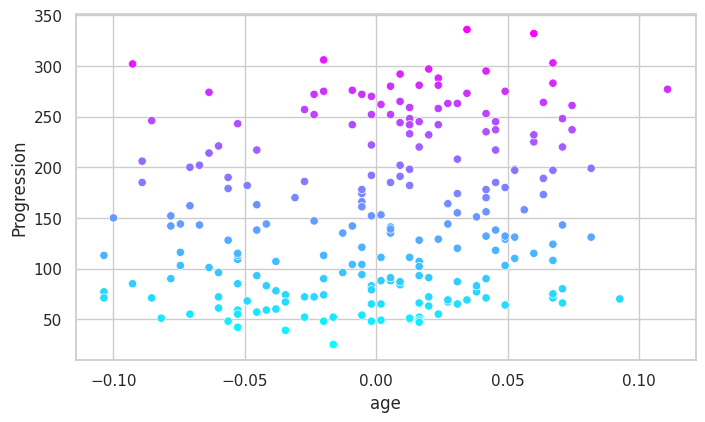

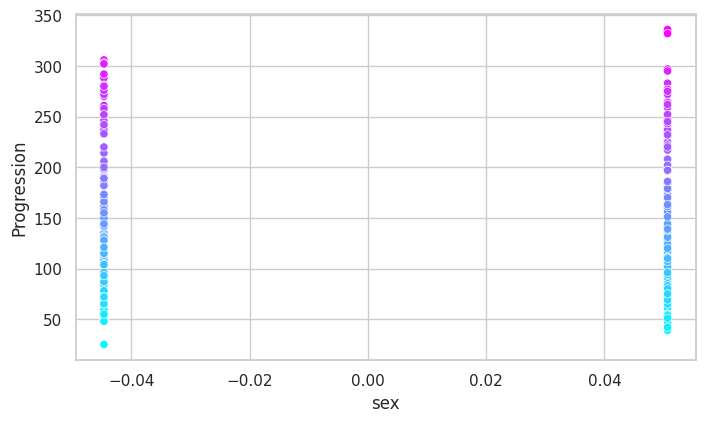

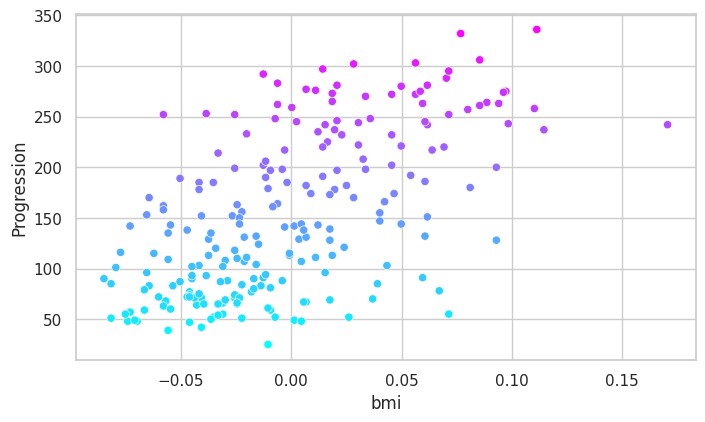

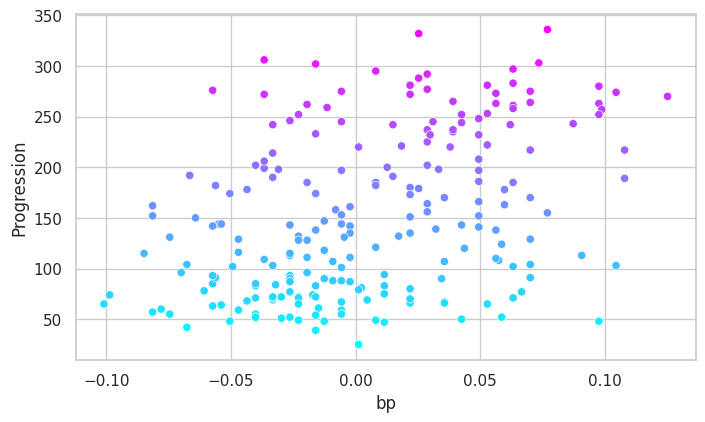

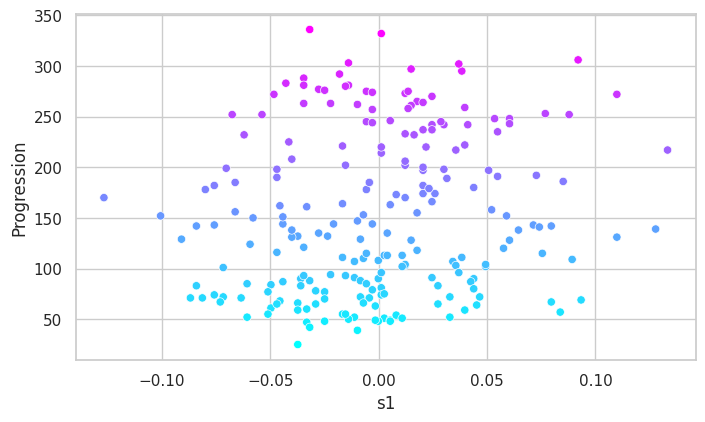

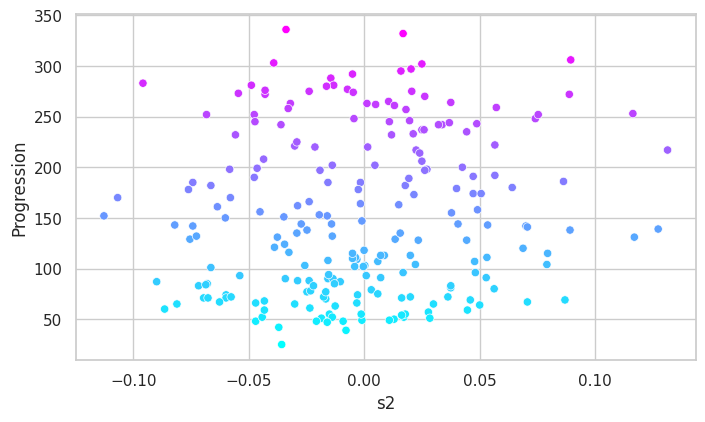

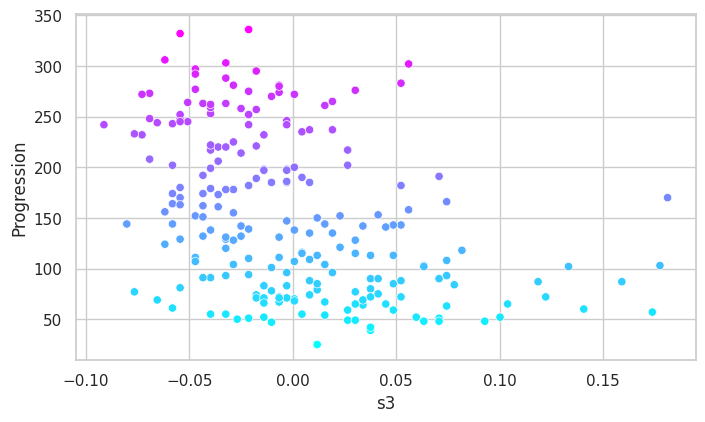

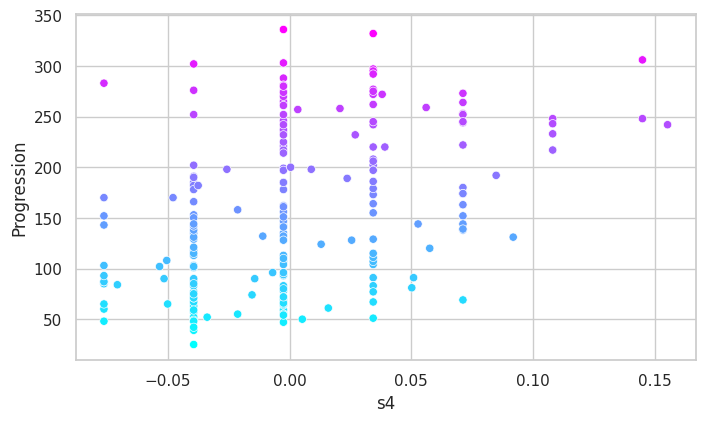

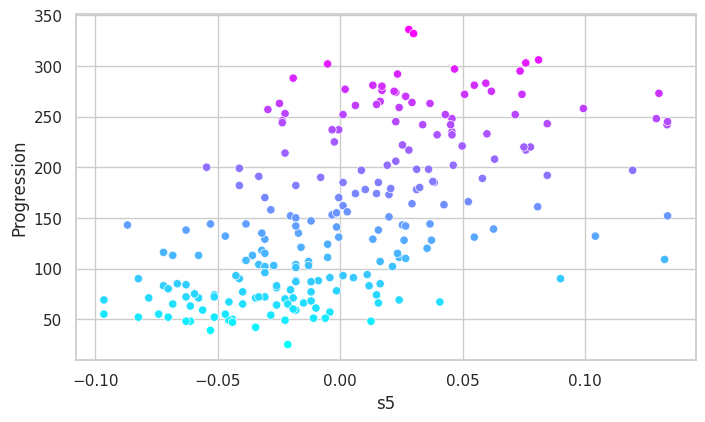

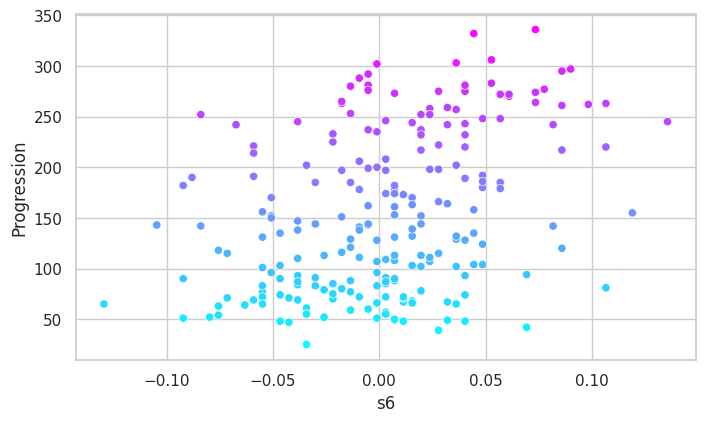

In [9]:
sample_df = diabetes_df.sample(frac=0.5, random_state=17)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale = 1)
sns.set_style('whitegrid')
for feature in diabetes.feature_names:
  plt.figure(figsize=(8, 4.5))
  sns.scatterplot(data=sample_df, x=feature, y="Progression", hue="Progression", palette='cool', legend=False)

Splitting the Dta for Training and Testing using train_test_split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=11)

In [11]:
X_train.shape

(331, 10)

In [12]:
X_test.shape

(111, 10)

Training the Model

In [13]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

# let's take a look at each features coefficient
for i, name in enumerate(diabetes.feature_names):
  print(f'{name:>10}: {linear_regression.coef_[i]}')

       age: -60.21981405677291
       sex: -266.45705232203574
       bmi: 523.0634112596993
        bp: 310.5134699670048
        s1: -336.1614738106944
        s2: 137.3392923842451
        s3: -131.13923283453653
        s4: -1.1492348017315557
        s5: 622.3286855688128
        s6: 60.466457691682535


In [14]:
# now let's look at the intercept coefficient
linear_regression.intercept_

152.22822762230342

Testing the model

In [15]:
predicted = linear_regression.predict(X_test)
expected = y_test

In [16]:
predicted[:5]

array([115.46474836,  83.4585369 , 160.77727376, 187.65710274,
        72.72122197])

In [17]:
expected[:5]

array([ 79.,  55., 109., 178.,  39.])

Visualizing the expected vs. predicted prices

In [18]:
df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

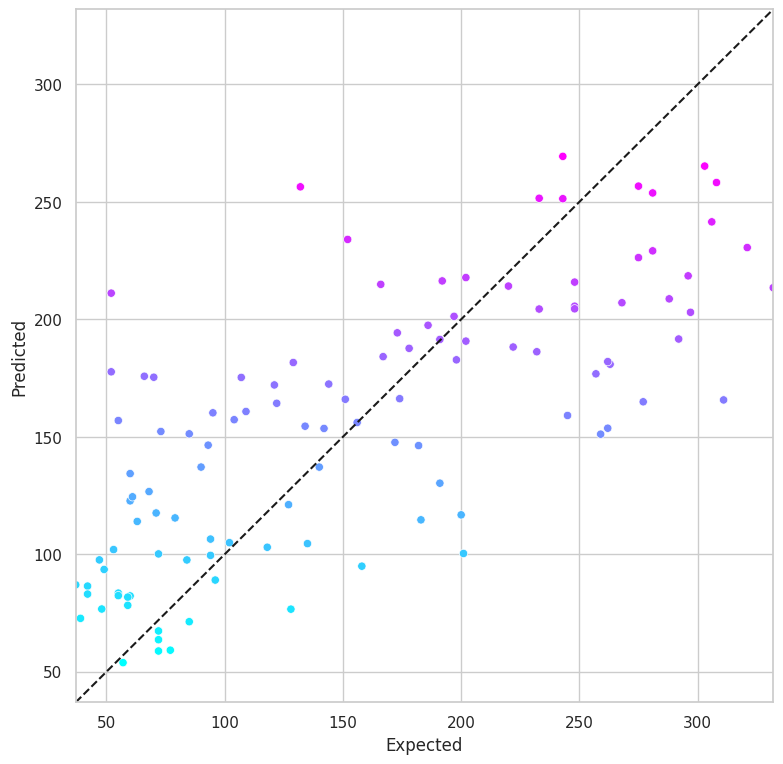

In [19]:
figure = plt.figure(figsize=(9,9))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())
axes.set_xlim(start, end)
axes.set_ylim(start, end)
line = plt.plot([start, end], [start, end], 'k--')

Regression Model Metrics

In [20]:
from sklearn import metrics
print('r2: ' + str(metrics.r2_score(expected, predicted)))
print('mse: ' + str(metrics.mean_squared_error(expected, predicted)))

r2: 0.5322429620529407
mse: 3458.2307025173577


Choosing the best model

In [24]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR

estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'HistGradientBoosting': HistGradientBoostingRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'SVR' : SVR()
}

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
        X=diabetes.data, y=diabetes.target, cv=kfold,
        scoring='r2')
    print(f'{estimator_name:>16}: ' +
          f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.475
      ElasticNet: mean of r2 scores=-0.002
           Lasso: mean of r2 scores=0.339
           Ridge: mean of r2 scores=0.421
HistGradientBoosting: mean of r2 scores=0.358
RandomForestRegressor: mean of r2 scores=0.415
             SVR: mean of r2 scores=0.169
